In [1]:
import importlib
import matplotlib.pyplot as plt
import numpy as np
import torch
from matplotlib import animation, rc

from IPython.display import HTML
%matplotlib inline

In [2]:
import sat_mujocoenv
import PPO_par as ppo


In [3]:
env = sat_mujocoenv.Sat_mujocoEnv(maxabs_torque=1e-1,
                     target_state = np.array([0,0,0,1,0,0,0]), w_mag = 10e-3 ,
                     w_tumble = None, Noise = None,visualize = False)

In [4]:
T = 1000
env.reset()
s = np.zeros((T, env.observation_dim))
r = np.zeros(T)
a = np.zeros((T, env.action_dim))
time = np.zeros(T)
s[0,:] = env.x
for t in range(1,T):
    a[t] = -10*s[t-1,4:]
    s[t,:], r[t], _ = env.step(a[t])

average reward per step = -103.25625471950538


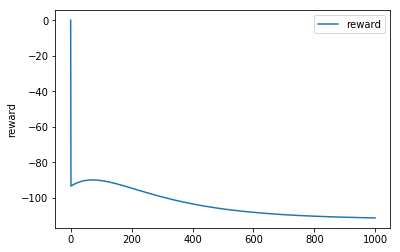

In [5]:
plt.plot(r, label='reward')
plt.ylabel('reward')
plt.legend()
print(f'average reward per step = {np.mean(r)}')

No handles with labels found to put in legend.


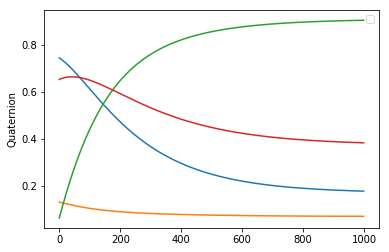

In [6]:
plt.ylabel('Quaternion')
plt.legend()
plt.plot(s[:,0:4], label='x')

No handles with labels found to put in legend.


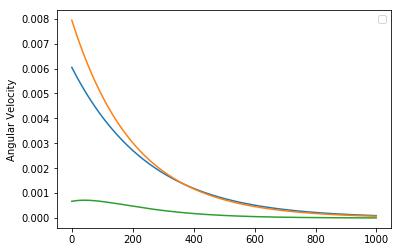

In [7]:
plt.ylabel('Angular Velocity')
plt.legend()
plt.plot(s[:,4:], label='x')

# PPO training

In [8]:
env = sat_mujocoenv.Sat_mujocoEnv(maxabs_torque=1e-1, 
                     target_state = np.array([0,0,0,1,0,0,0]), w_mag = 10e-3 ,
                     w_tumble = None, Noise = None,visualize = False)
agent = ppo.PPOAgent(env)

In [ ]:
gamma = 0.99
lamb = 0.95
number_of_actors = 50
number_of_iterations = 200
horizon = 200
number_of_epochs = 100
minibatch_size = 100
logstd_initial = -1 #-0.7
logstd_final = -2 # -1.6
epsilon = 0.2
use_multiprocess = False
res = agent.train(
    'Sat',
    gamma,
    lamb,
    number_of_actors,
    number_of_iterations,
    horizon,
    number_of_epochs,
    minibatch_size,
    logstd_initial,
    logstd_final,
    epsilon,
    use_multiprocess,
)

percent done:  0.0
percent done:  10.0
percent done:  20.0


In [ ]:
plt.plot(res['rewards'])
plt.xlabel('iteration')
plt.ylabel('reward');

In [ ]:
plt.plot(res['losses'], label='L')
plt.plot(res['losses_clip'], label='L_clip')
plt.plot(res['losses_V'], label='L_V')
plt.xlabel('iteration')
plt.ylabel('loss')
plt.legend();

In [ ]:
plt.plot(res['losses_V'], label='L_V')
plt.xlabel('iteration')
plt.ylabel('loss_V');

In [ ]:
plt.plot(res['stds'])
plt.xlabel('iteration')
plt.gca().set_ylim(bottom=0)
plt.ylabel('standard deviation');

In [ ]:
plt.plot(res['times_sample'], label='sample')
plt.plot(res['times_opt'], label='opt')
plt.gca().set_ylim(bottom=0)
plt.legend();
plt.xlabel('iteration')
plt.ylabel('time per iteration / seconds');

# Pendulum simulation with agent

In [23]:
T = 200
env.reset()
s = np.zeros((T, env.observation_dim))
r = np.zeros(T)
a = np.zeros(T)
time = np.zeros(T)
s[0,:] = env.s
for t in range(1,T):
    a[t] = agent.action_greedy(s[t-1,:])
    s[t,:], r[t], _ = env.step(a[t])
    time[t] = (t - 1) * env.params['dt']

average reward per step = -0.16211333042847095


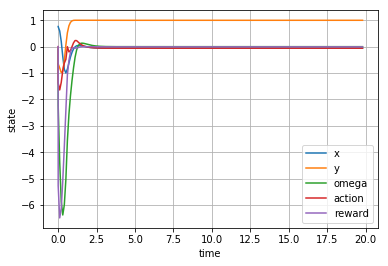

In [24]:
plt.plot(time, s[:,0], label='x')
plt.plot(time, s[:,1], label='y')
plt.plot(time, s[:,2], label='omega')
plt.plot(time, a, label='action')
plt.plot(time, r, label='reward')
plt.xlabel('time')
plt.ylabel('state')
plt.legend()
plt.grid()
print(f'average reward per step = {np.mean(r)}')

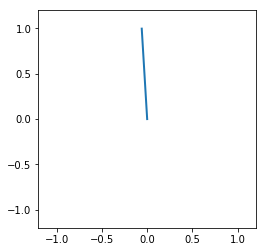

In [25]:
anim = animate(s)
HTML(anim.to_jshtml())

In [ ]:
for p in agent.net.parameters():
    print(p)